# Proyek Analisa Data

## Pertanyaan Bisnis

1.   Bagaimana tren penjualan berdasarkan waktu?
2.   Apa Kategori yang terlaris berdasarkan jumlah terjual ('Qty')?
3.   Persentase status pengiriman yang melakukan transaksi?
4.   Customer lebih menyukai pembelian melalui Amazon langsung atau tidak?
5.   Customer lebih menyukai tipe service pengirimanan apa?
6.   Kategori apa yang paling banyak dipesan Customer?
7.   Berapa persentase status pengirimana kurir pada kolom (Courier Status)
8.   Produk apa saja yang paling laris setiap bulannya?
9.   Perbandingan Pembelian melalui Amazon atau Merchant dengan status pengiriman 'courir_status' & 'Fulfilment'
10.  10 Provinsi dengan pengiriman yang paling banyak? ship-city
11.  10 Ibu kota dengan pengiriman yang paling banyak? ship-state
12.  Berapa banyak dari persentasi yang menggunakan B2B False or True? kolom ('B2B')











## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Data Wrangling

### Gathering Data

In [2]:
sales_df = pd.read_csv("https://raw.githubusercontent.com/mhmdfikrii/AmazonSales_dataset/main/Dataset/Amazon%20Sale%20Report.csv")
sales_df.head()

<ipython-input-2-ec2f1b00b8dc>:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df = pd.read_csv("https://raw.githubusercontent.com/mhmdfikrii/AmazonSales_dataset/main/Dataset/Amazon%20Sale%20Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


### Assessing Data

In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [4]:
len(sales_df.index)

128975

In [5]:
sales_df.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [6]:
print("Jumlah duplikasi: ", sales_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
sales_df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


### Cleaning Data

#### Memperbaiki Tipe Data

In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [9]:
datetime_columns = ["Date"]

for column in datetime_columns:
  sales_df[column] = pd.to_datetime(sales_df[column])

In [10]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128975 non-null  int64         
 1   Order ID            128975 non-null  object        
 2   Date                128975 non-null  datetime64[ns]
 3   Status              128975 non-null  object        
 4   Fulfilment          128975 non-null  object        
 5   Sales Channel       128975 non-null  object        
 6   ship-service-level  128975 non-null  object        
 7   Style               128975 non-null  object        
 8   SKU                 128975 non-null  object        
 9   Category            128975 non-null  object        
 10  Size                128975 non-null  object        
 11  ASIN                128975 non-null  object        
 12  Courier Status      122103 non-null  object        
 13  Qty                 128975 no

In [11]:
sales_df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


#### Missing Value

In [12]:
sales_df.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [13]:
sales_df[sales_df["Courier Status"].isna()]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
23,23,404-6019946-2909948,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET291,SET291-KR-PP-M,Set,...,INR,570.48,pune,MAHARASHTRA,411044.0,IN,NaN,False,Easy Ship,NaN
29,29,404-5933402-8801952,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,JNE2132,JNE2132-KR-398-XXXL,kurta,...,NaN,NaN,GUWAHATI,ASSAM,781003.0,IN,NaN,False,Easy Ship,NaN
83,83,404-6522553-9345930,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET377,SET377-KR-NP-M,Set,...,INR,1105.36,DEHRADUN,UTTARAKHAND,248001.0,IN,NaN,False,Easy Ship,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128762,128762,402-4651401-6366769,2022-06-01,Cancelled,Merchant,Amazon.in,Standard,J0184,J0184-KR-A-S,kurta,...,INR,385.71,BENGALURU,KARNATAKA,560043.0,IN,NaN,False,Easy Ship,False
128808,128808,408-4182027-2307535,2022-06-01,Cancelled,Merchant,Amazon.in,Standard,JNE3619,JNE3619-KR-S,kurta,...,NaN,NaN,BENGALURU,KARNATAKA,560092.0,IN,NaN,False,Easy Ship,False
128855,128855,402-1958677-2521967,2022-06-01,Cancelled,Merchant,Amazon.in,Standard,JNE3568,JNE3568-KR-M,kurta,...,NaN,NaN,Cherukunnu (p.o),KERALA,670301.0,IN,NaN,False,Easy Ship,False
128875,128875,403-9524128-9243508,2022-06-01,Cancelled,Merchant,Amazon.in,Standard,JNE3797,JNE3797-KR-XL,Western Dress,...,INR,734.29,Barabanki,UTTAR PRADESH,225001.0,IN,NaN,False,Easy Ship,False


In [14]:
sales_df['Courier Status'].fillna(value='Cancelled', inplace=True)

In [15]:
sales_df['currency'].fillna(value='INR', inplace=True)

In [16]:
sales_df['Amount'].fillna(value=0, inplace=True)

In [17]:
sales_df['ship-city'].value_counts()

BENGALURU                                      11217
HYDERABAD                                       8074
MUMBAI                                          6126
NEW DELHI                                       5795
CHENNAI                                         5421
                                               ...  
Khandavalli, peravali mandal, west godavari        1
Bhayander west                                     1
JAKHALMANDI                                        1
Arariya                                            1
Halol                                              1
Name: ship-city, Length: 8955, dtype: int64

In [18]:
sales_df['ship-city'].fillna(value='BENGALURU', inplace=True)

In [19]:
sales_df['ship-state'].value_counts()

MAHARASHTRA               22260
KARNATAKA                 17326
TAMIL NADU                11483
TELANGANA                 11330
UTTAR PRADESH             10638
                          ...  
Mizoram                       1
rajsthan                      1
Punjab/Mohali/Zirakpur        1
Rajsthan                      1
orissa                        1
Name: ship-state, Length: 69, dtype: int64

In [20]:
sales_df['ship-state'].fillna(value='MAHARASHTRA', inplace=True)

In [21]:
sales_df['ship-postal-code'].value_counts()

201301.0    1006
122001.0     688
560037.0     632
560068.0     619
560076.0     581
            ... 
144006.0       1
829108.0       1
263637.0       1
815353.0       1
629152.0       1
Name: ship-postal-code, Length: 9459, dtype: int64

In [22]:
sales_df['ship-postal-code'].fillna(value=201301, inplace=True)

In [23]:
float_columns = ["ship-postal-code"]

for column in float_columns:
    sales_df[column] = sales_df[column].astype(int)

In [24]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128975 non-null  int64         
 1   Order ID            128975 non-null  object        
 2   Date                128975 non-null  datetime64[ns]
 3   Status              128975 non-null  object        
 4   Fulfilment          128975 non-null  object        
 5   Sales Channel       128975 non-null  object        
 6   ship-service-level  128975 non-null  object        
 7   Style               128975 non-null  object        
 8   SKU                 128975 non-null  object        
 9   Category            128975 non-null  object        
 10  Size                128975 non-null  object        
 11  ASIN                128975 non-null  object        
 12  Courier Status      128975 non-null  object        
 13  Qty                 128975 no

In [25]:
sales_df['ship-country'].fillna(value='IN', inplace=True)

In [26]:
sales_df['promotion-ids'].value_counts()

IN Core Free Shipping 2015/04/08 23-48-5-108                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [27]:
sales_df['promotion-ids'].fillna(value='IN Core Free Shipping 2015/04/08 23-48-5-108', inplace=True)

In [28]:
sales_df['fulfilled-by'].fillna(value='Easy Ship', inplace=True)

In [29]:
sales_df['Unnamed: 22'].fillna(value='False', inplace=True)

In [30]:
sales_df.isna().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
Unnamed: 22           0
dtype: int64

## Exploratory Data Analysis (EDA)

In [31]:
sales_df.sample(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
9611,9611,171-9029483-7671566,2022-04-24,Shipped,Amazon,Amazon.in,Expedited,JNE3706,JNE3706-DR-L,Western Dress,...,INR,413.0,HYDERABAD,TELANGANA,500014,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
24433,24433,405-2059720-6797119,2022-04-16,Shipped,Amazon,Amazon.in,Expedited,JNE2270,JNE2270-KR-487-A-XXL,kurta,...,INR,518.0,SAWAI MADHOPUR,RAJASTHAN,322001,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
47757,47757,407-9953842-9506751,2022-04-01,Shipped,Amazon,Amazon.in,Expedited,SET336,SET336-KR-NP-L,Set,...,INR,865.0,GUWAHATI,ASSAM,781005,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
28636,28636,171-5204711-4733905,2022-04-13,Shipped,Amazon,Amazon.in,Expedited,SET331,SET331-KR-NP-M,Set,...,INR,597.0,Noida,UTTAR PRADESH,201306,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
82884,82884,403-4545087-3426733,2022-05-05,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3518,JNE3518-KR-XL,kurta,...,INR,458.0,MUMBAI,MAHARASHTRA,400081,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False


In [32]:
sales_df.describe(include="all")

<ipython-input-32-c4bdad015068>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  sales_df.describe(include="all")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
count,128975.000000,128975,128975,128975,128975,128975,128975,128975,128975,128975,...,128975,128975.000000,128975,128975,128975.000000,128975,128975,128975,128975,128975
unique,NaN,120378,91,13,2,2,2,1377,7195,9,...,1,NaN,8955,69,NaN,1,5787,2,1,2
top,NaN,171-5057375-2831560,2022-05-03 00:00:00,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,...,INR,NaN,BENGALURU,MAHARASHTRA,NaN,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
freq,NaN,12,2085,77804,89698,128851,88615,4224,773,50284,...,128975,NaN,11250,22293,NaN,128975,95253,128104,128975,79925
first,NaN,NaN,2022-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2022-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,64487.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,609.363662,NaN,NaN,463899.030052,NaN,NaN,NaN,NaN,NaN
std,37232.019822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,313.347147,NaN,NaN,191498.352590,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,110001.000000,NaN,NaN,NaN,NaN,NaN
25%,32243.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,413.000000,NaN,NaN,382421.000000,NaN,NaN,NaN,NaN,NaN


In [33]:
sales_df['index'].is_unique

True

In [34]:
sales_df['Order ID'].is_unique

False

In [35]:
sales_df['Style'].is_unique

False

In [36]:
sales_df['SKU'].is_unique

False

In [37]:
sales_df['ASIN'].is_unique

False

In [38]:
sales_df['ship-postal-code'].is_unique

False

In [39]:
sales_df['index'].duplicated

<bound method Series.duplicated of 0              0
1              1
2              2
3              3
4              4
           ...  
128970    128970
128971    128971
128972    128972
128973    128973
128974    128974
Name: index, Length: 128975, dtype: int64>

In [40]:
sales_df.groupby(by=['Order ID']).index.nunique().sort_values(ascending=False)

Order ID
403-4984515-8861958    12
171-5057375-2831560    12
403-0173977-3041148    11
404-9932919-6662730    11
408-3317403-1729937    10
                       ..
403-8053007-5615559     1
403-8052959-3139552     1
403-8050222-3232316     1
403-8050149-7997962     1
S02-9878098-5959538     1
Name: index, Length: 120378, dtype: int64

In [41]:
sales_df.groupby(by=['Status']).index.nunique().sort_values(ascending=False)

Status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: index, dtype: int64

In [42]:
sales_df.groupby(by="Fulfilment").agg({
    "index": "nunique"
})

,index
Fulfilment,
Amazon,89698
Merchant,39277


In [43]:
sales_df.groupby(by=['Sales Channel ']).agg({
    "index": "nunique"
})

,index
Sales Channel,
Amazon.in,128851
Non-Amazon,124


In [44]:
sales_df.groupby(by=['ship-service-level']).agg({
    "index": "nunique"
})

,index
ship-service-level,
Expedited,88615
Standard,40360


In [45]:
sales_df.groupby(by=['Category']).agg({
    "index": "nunique",
     "Qty": ["sum", "max", "min", "mean", "std" ]
})

index    Qty                            
              nunique    sum max min      mean       std
Category                                                
Blouse            926    863  15   0  0.931965  0.558680
Bottom            440    398   2   0  0.904545  0.323671
Dupatta             3      3   1   1  1.000000  0.000000
Ethnic Dress     1159   1053   2   0  0.908542  0.297232
Saree             164    152   3   0  0.926829  0.359976
Set             50284  45289   8   0  0.900664  0.310789
Top             10622   9903   3   0  0.932310  0.264372
Western Dress   15500  13943   4   0  0.899548  0.311572
kurta           49877  45045  13   0  0.903122  0.319517

In [46]:
sales_df.groupby(by=['Courier Status']).agg({
    "index": "nunique"
})

,index
Courier Status,
Cancelled,12807
Shipped,109487
Unshipped,6681


In [47]:
result_df = sales_df.groupby(by=['Category']).agg({
    "index": "nunique",
    "Qty": "sum",
    "Amount": ["max", "min", "sum"]
}).sort_values(by=("Amount", "sum"), ascending=False)
result_df

index    Qty   Amount                    
              nunique    sum      max    min          sum
Category                                                 
Set             50284  45289  5584.00    0.0  39204124.03
kurta           49877  45045  2796.00    0.0  21299546.70
Western Dress   15500  13943  2860.00    0.0  11216072.69
Top             10622   9903  1797.00    0.0   5347792.30
Ethnic Dress     1159   1053  1449.00    0.0    791217.66
Blouse            926    863  1266.66    0.0    458408.18
Bottom            440    398  1028.58    0.0    150667.98
Saree             164    152  2058.00    0.0    123933.76
Dupatta             3      3   305.00  305.0       915.00

In [48]:
sales_df.groupby(by=['ship-city']).index.nunique().sort_values(ascending=False)

ship-city
BENGALURU                 11250
HYDERABAD                  8074
MUMBAI                     6126
NEW DELHI                  5795
CHENNAI                    5421
                          ...  
Kharghar, NAVI MUMBAI         1
Khardaha                      1
Kharar, Mohali                1
Kharagpur, West Bengal        1
MADIKONDA                     1
Name: index, Length: 8955, dtype: int64

In [49]:
sales_df.groupby(by=['ship-state']).index.nunique().sort_values(ascending=False)

ship-state
MAHARASHTRA      22293
KARNATAKA        17326
TAMIL NADU       11483
TELANGANA        11330
UTTAR PRADESH    10638
                 ...  
PB                   1
Nagaland             1
AR                   1
APO                  1
rajsthan             1
Name: index, Length: 69, dtype: int64

In [50]:
sales_df.groupby(by=['B2B']).agg({
    "index": "nunique"
})

,index
B2B,
False,128104
True,871


In [51]:
sales_df.to_csv("E-CommerceSalesAmazon.csv", index=False)

## Visualization & Explanatory Analysis

### Bagaimana tren penjualan berdasarkan waktu?

In [52]:
sales_df.sample(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
63647,63647,403-0480588-2169134,2022-05-20,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3793,JNE3793-KR-XL,kurta,...,INR,355.0,NEW DELHI,DELHI,110032,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
60321,60321,171-9217192-8355548,2022-05-23,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET217,SET217-KR-PP-XXXL,Set,...,INR,786.0,BAREILLY,UTTAR PRADESH,243002,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
47849,47849,407-4352983-3926705,2022-04-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE2049,JNE2049-KR-351-XXXL1,kurta,...,INR,399.0,VELLORE,TAMIL NADU,632002,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
8373,8373,404-0234490-0270763,2022-04-25,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,588.0,KOLKATA,WEST BENGAL,700097,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
94799,94799,171-1114886-8599558,2022-06-26,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Western Dress,...,INR,735.0,KOLAZHY,KERALA,680010,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False


In [53]:
monthly_orders_df = sales_df.resample(rule='M', on='Date').agg({
    "Qty": "sum",
    "Amount": "sum"
})

# Mengatur indeks ulang dengan format bulan dan tahun
monthly_orders_df.index = monthly_orders_df.index.strftime('%B %Y')

# Mengatur nama kolom
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "Qty": "order_count",
    "Amount": "revenue"
}, inplace=True)

monthly_orders_df.head()

,Date,order_count,revenue
0,March 2022,156,101683.85
1,April 2022,44206,28838708.32
2,May 2022,38011,26226476.75
3,June 2022,34276,23425809.38


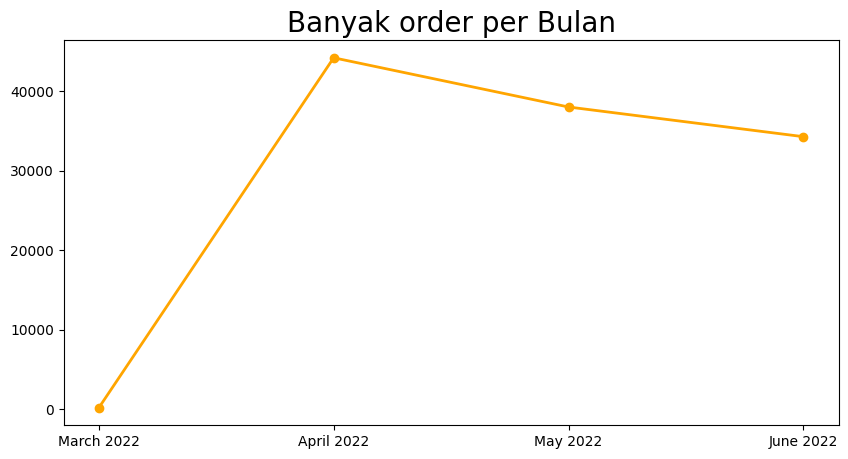

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["Date"],
    monthly_orders_df["order_count"],
    marker='o',
    linewidth=2,
    color="orange"
)
plt.title("Banyak order per Bulan", loc="center", fontsize=20)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

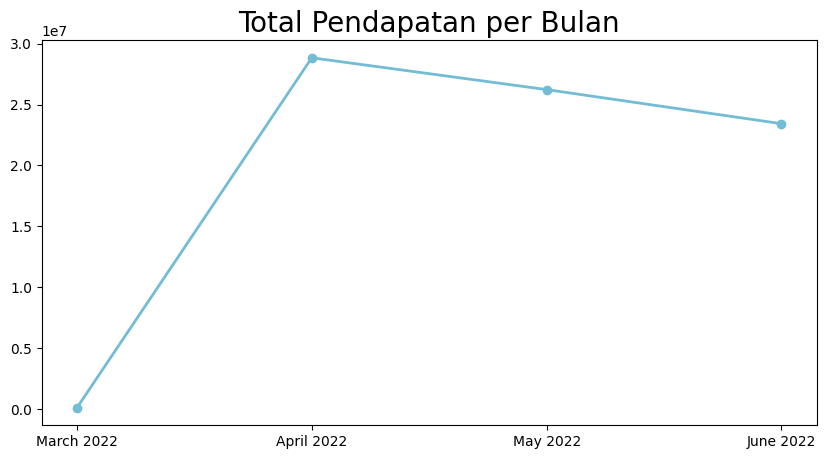

In [55]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["Date"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Pendapatan per Bulan", loc="center", fontsize=20)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Persentase status pengiriman yang melakukan transaksi?

In [56]:
status_Cancelled = len(sales_df[sales_df['Status'] == 'Cancelled'])
status_Shipped = len(sales_df[sales_df['Status'] == 'Shipped'])
status_Pending = len(sales_df[sales_df['Status'] == 'Pending'])
status_Shipping = len(sales_df[sales_df['Status'] == 'Shippi  ng'])
status_WaitingPickUp = len(sales_df[sales_df['Status'] == 'Pending - Waiting for Pick Up'])
status_Damaged = len(sales_df[sales_df['Status'] == 'Shipped - Damaged'])
status_DeliveredtoBuyer = len(sales_df[sales_df['Status'] == 'Shipped - Delivered to Buyer'])
status_LostinTransit = len(sales_df[sales_df['Status'] == 'Shipped - Lost in Transit'])
status_OutforDelivery = len(sales_df[sales_df['Status'] == 'Shipped - Out for Delivery'])
status_PickUp = len(sales_df[sales_df['Status'] == 'Shipped - Picked Up'])
status_RejectedbyBuyer = len(sales_df[sales_df['Status'] == 'Shipped - Rejected by Buyer'])
status_ReturnedtoSeller = len(sales_df[sales_df['Status'] == 'Shipped - Returned to Seller'])
status_ReturningtoSeller = len(sales_df[sales_df['Status'] == 'Shipped - Returning to Seller'])


total_status = len(sales_df)

persentase_cancelled = (status_Cancelled / total_status) * 100
persentase_shipping = (status_Shipping / total_status) * 100
persentase_shipped = (status_Shipped / total_status) * 100
persentase_pending = (status_Pending / total_status) * 100
persentase_waitingpickup = (status_WaitingPickUp / total_status) * 100
persentase_damage = (status_Damaged / total_status) * 100
persentase_delivertobuyer = (status_DeliveredtoBuyer / total_status) * 100
persentase_lostintransit = (status_LostinTransit / total_status) * 100
persentase_outofdelivery = (status_OutforDelivery / total_status) * 100
persentase_pickup = (status_PickUp / total_status) * 100
persentase_rejectedbuyer = (status_RejectedbyBuyer / total_status) * 100
persentase_returnedtoseller = (status_ReturnedtoSeller / total_status) * 100
persentase_returningtoseller = (status_ReturningtoSeller / total_status) * 100


persentase_cancelled_formatted = "{:.2f}".format(persentase_cancelled)
persentase_shipping_formatted = "{:.2f}".format(persentase_shipping)
persentase_shipped_formatted = "{:.2f}".format(persentase_shipped)
persentase_pending_formatted = "{:.2f}".format(persentase_pending)
persentase_waitingpickup_formatted = "{:.2f}".format(persentase_waitingpickup)
persentase_damage_formatted = "{:.2f}".format(persentase_damage)
persentase_delivertobuyer_formatted = "{:.2f}".format(persentase_delivertobuyer)
persentase_lostintransit_formatted = "{:.2f}".format(persentase_lostintransit)
persentase_outofdelivery_formatted = "{:.2f}".format(persentase_outofdelivery)
persentase_pickup_formatted = "{:.2f}".format(persentase_pickup)
persentase_rejectedbuyer_formatted = "{:.2f}".format(persentase_rejectedbuyer)
persentase_returnedtoseller_formatted = "{:.2f}".format(persentase_returnedtoseller)
persentase_returningtoseller_formatted = "{:.2f}".format(persentase_returningtoseller)


print("Persentase Status Pengiriman")
print("Status Cancelled:", persentase_cancelled_formatted, "%")
print("Status Shipping:", persentase_shipping_formatted, "%")
print("Status Shipped:", persentase_shipped_formatted, "%")
print("Status Pending:", persentase_pending_formatted, "%")
print("Status Waiting Pick Up:", persentase_waitingpickup_formatted, "%")
print("Status Damaged:", persentase_damage_formatted, "%")
print("Status Delivered to Buyer:", persentase_delivertobuyer_formatted, "%")
print("Status Lost In Transit:", persentase_lostintransit_formatted, "%")
print("Status Out Of Delivery:", persentase_outofdelivery_formatted, "%")
print("Status Pick Up:", persentase_pickup_formatted, "%")
print("Status Rejected Buyer:", persentase_rejectedbuyer_formatted, "%")
print("Status Returned To Seller:", persentase_returnedtoseller_formatted, "%")
print("Status Returning To seller:", persentase_returningtoseller_formatted, "%")

Persentase Status Pengiriman
Status Cancelled: 14.21 %
Status Shipping: 0.00 %
Status Shipped: 60.32 %
Status Pending: 0.51 %
Status Waiting Pick Up: 0.22 %
Status Damaged: 0.00 %
Status Delivered to Buyer: 22.31 %
Status Lost In Transit: 0.00 %
Status Out Of Delivery: 0.03 %
Status Pick Up: 0.75 %
Status Rejected Buyer: 0.01 %
Status Returned To Seller: 1.51 %
Status Returning To seller: 0.11 %


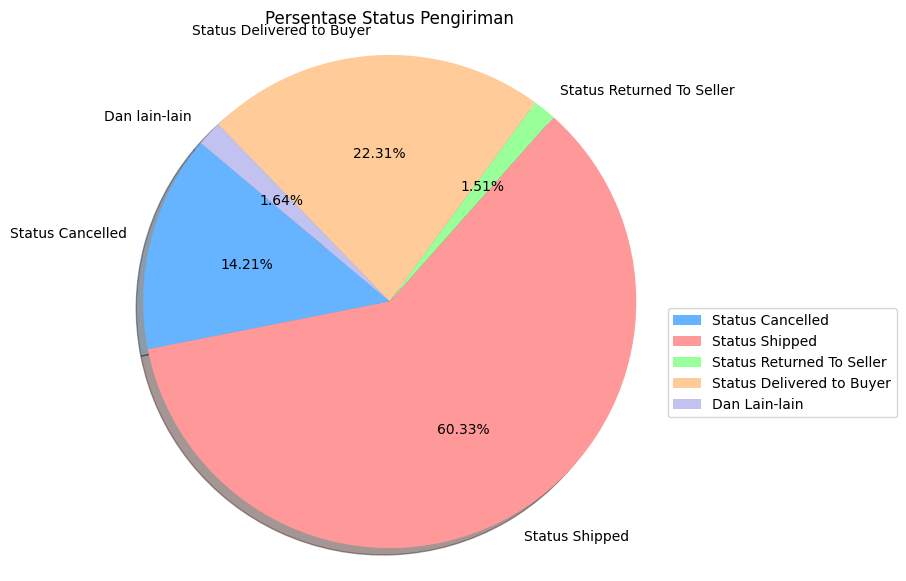

In [57]:
labels = ['Status Cancelled', 'Status Shipping', 'Status Shipped', 'Status Returned To Seller', 'Status Pending', 'Status Waiting Pick Up', 'Status Damaged', 'Status Delivered to Buyer',
          'Status Lost In Transit', 'Status Out Of Delivery', 'Status Pick Up', 'Status Rejected Buyer', 'Status Returning To seller']
sizes = [persentase_cancelled, persentase_shipping, persentase_shipped, persentase_returnedtoseller, persentase_pending, persentase_waitingpickup, persentase_damage, persentase_delivertobuyer,
         persentase_lostintransit, persentase_outofdelivery, persentase_pickup, persentase_rejectedbuyer, persentase_returningtoseller]
colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ffb366', '#e6f2ff', '#ffb3b3', '#c2f0f0', '#ff6666', '#ff6666']
explode = (0,) + (0,) * (len(labels) - 1)  # Menyesuaikan panjang explode

# Menangani nilai di bawah 0%
sizes = [max(0, val) for val in sizes]

# Menambahkan kondisi untuk menangani nilai "Lain-lain"
total_sizes = sum(sizes)
threshold_percentage = 1  # Atur ambang batas persentase di bawah 1% sebagai "Lain-lain"

# Mendapatkan indeks nilai yang kurang dari ambang batas persentase
other_indices = [i for i, val in enumerate(sizes) if val / total_sizes < threshold_percentage / 100]

# Menyimpan nilai "Lain-lain"
other_size = sum(sizes[i] for i in other_indices)

# Mengganti nilai "Lain-lain" dengan label "Lain-lain"
for i in other_indices:
    labels[i] = 'Lain-lain'

# Menghapus nilai-nilai "Lain-lain" dari sizes dan labels
sizes = [sizes[i] for i in range(len(sizes)) if i not in other_indices]
labels = [label for i, label in enumerate(labels) if i not in other_indices]

# Membuat diagram pie
explode = explode[:len(labels)] + (0,)  # Menyesuaikan panjang explode kembali
plt.figure(figsize=(7, 7))
plt.pie(sizes + [other_size], explode=explode, labels=labels + ['Dan lain-lain'], colors=colors, autopct='%1.2f%%', shadow=True, startangle=140)

# Menambahkan legenda
plt.legend(labels + ['Dan Lain-lain'], loc="upper left", bbox_to_anchor=(1, 0.5))

plt.title("Persentase Status Pengiriman")
plt.axis('equal')

plt.show()


In [58]:
sales_df.groupby(by="Status").index.nunique().sort_values(ascending=False).reset_index().head(13)

,Status,index
0,Shipped,77804
1,Shipped - Delivered to Buyer,28769
2,Cancelled,18332
3,Shipped - Returned to Seller,1953
4,Shipped - Picked Up,973
5,Pending,658
6,Pending - Waiting for Pick Up,281
7,Shipped - Returning to Seller,145
8,Shipped - Out for Delivery,35
9,Shipped - Rejected by Buyer,11


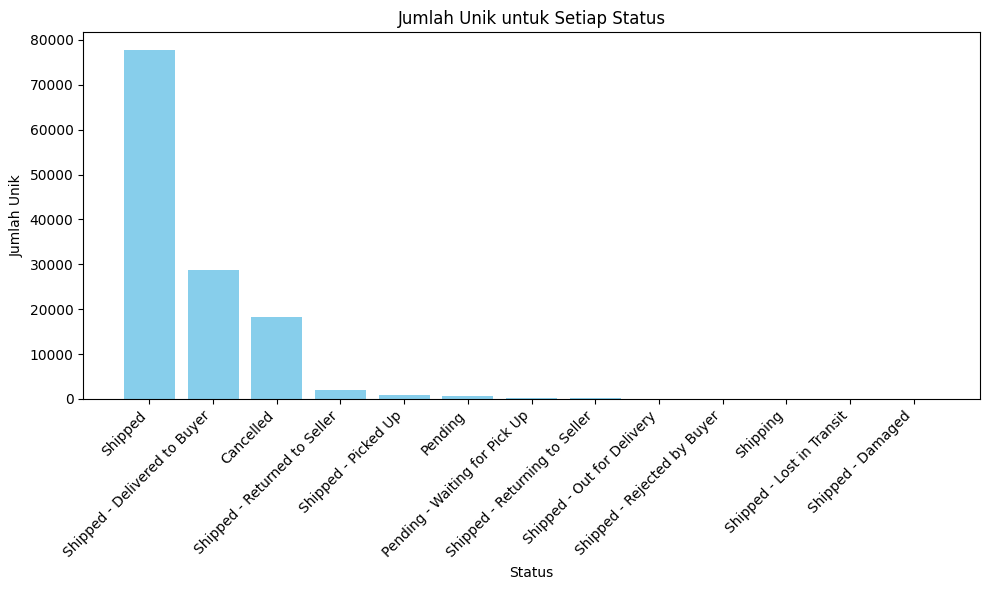

In [59]:
data = sales_df.groupby(by="Status").index.nunique().sort_values(ascending=False).reset_index().head(13)
plt.figure(figsize=(10, 6))
plt.bar(data['Status'], data['index'], color='skyblue')
plt.xlabel('Status')
plt.ylabel('Jumlah Unik')
plt.title('Jumlah Unik untuk Setiap Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

### Customer lebih menyukai pembelian melalui Amazon langsung atau tidak?

In [60]:
sales_df.groupby(by="Fulfilment").index.nunique().sort_values(ascending=False).reset_index().head()

,Fulfilment,index
0,Amazon,89698
1,Merchant,39277


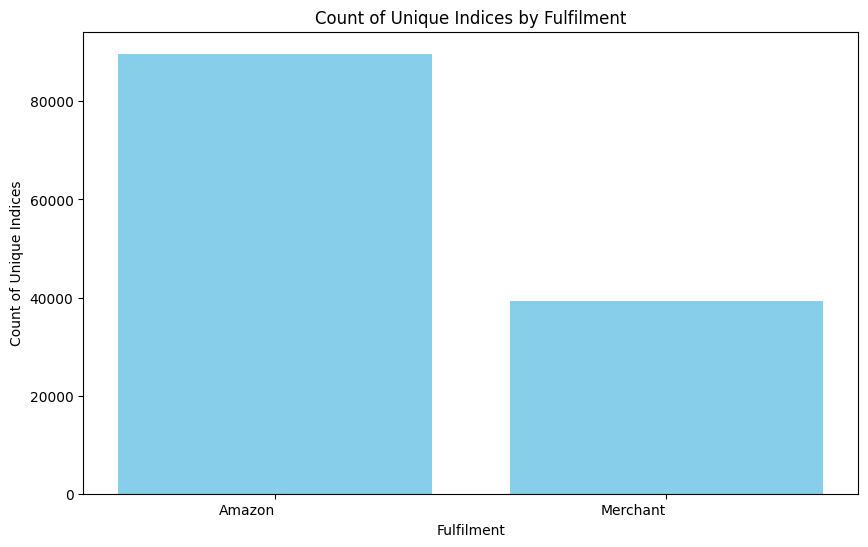

In [61]:
grouped_data = sales_df.groupby(by="Fulfilment")["index"].nunique().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(grouped_data["Fulfilment"], grouped_data["index"], color='skyblue')
plt.title("Count of Unique Indices by Fulfilment")
plt.xlabel("Fulfilment")
plt.ylabel("Count of Unique Indices")
plt.xticks(rotation=0, ha='right')
plt.show()

In [62]:
sales_df.groupby(by="Sales Channel ").index.nunique().sort_values(ascending=False).reset_index().head()

,Sales Channel,index
0,Amazon.in,128851
1,Non-Amazon,124


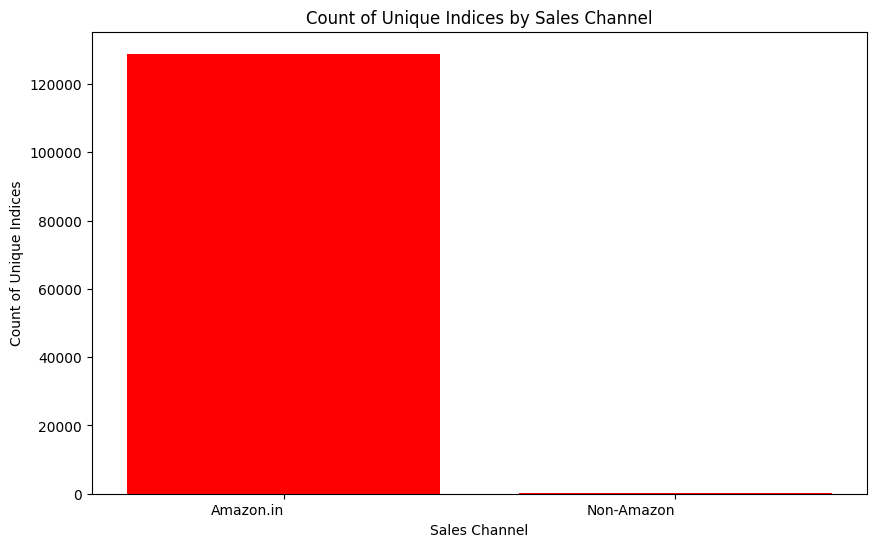

In [63]:
grouped_data = sales_df.groupby(by="Sales Channel ").index.nunique().sort_values(ascending=False).reset_index().head()

plt.figure(figsize=(10, 6))
plt.bar(grouped_data["Sales Channel "], grouped_data["index"], color='red')
plt.title("Count of Unique Indices by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Count of Unique Indices")
plt.xticks(rotation=0, ha='right')
plt.show()

### Customer lebih menyukai tipe service pengirimanan apa?

In [64]:
sales_df.groupby(by="ship-service-level").index.nunique().sort_values(ascending=False).reset_index().head()

,ship-service-level,index
0,Expedited,88615
1,Standard,40360


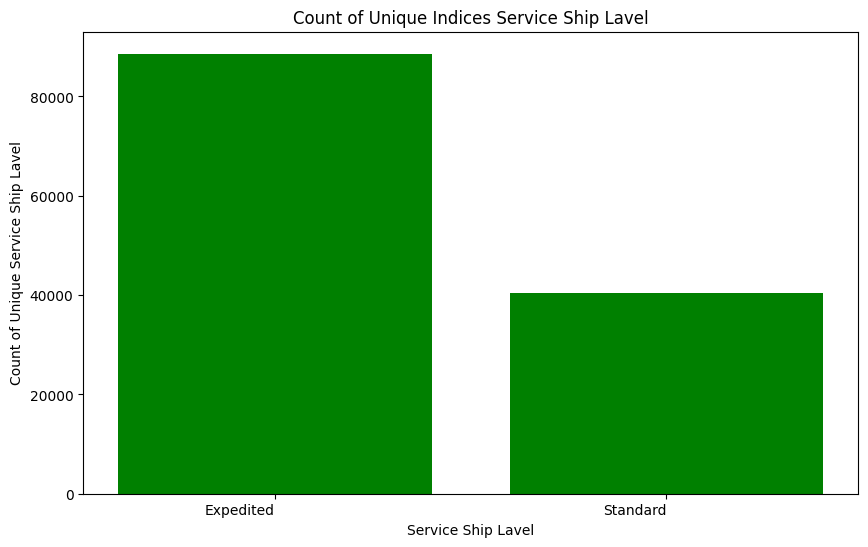

In [65]:
grouped_data = sales_df.groupby(by="ship-service-level").index.nunique().sort_values(ascending=False).reset_index().head()
plt.figure(figsize=(10, 6))
plt.bar(grouped_data["ship-service-level"], grouped_data["index"], color='green')
plt.title("Count of Unique Indices Service Ship Lavel")
plt.xlabel("Service Ship Lavel")
plt.ylabel("Count of Unique Service Ship Lavel")
plt.xticks(rotation=0, ha='right')
plt.show()

### Kategori apa yang paling banyak dipesan Customer?

In [66]:
sales_df.groupby(by="Category").Qty.sum().sort_values(ascending=False).reset_index().head(10)

,Category,Qty
0,Set,45289
1,kurta,45045
2,Western Dress,13943
3,Top,9903
4,Ethnic Dress,1053
5,Blouse,863
6,Bottom,398
7,Saree,152
8,Dupatta,3


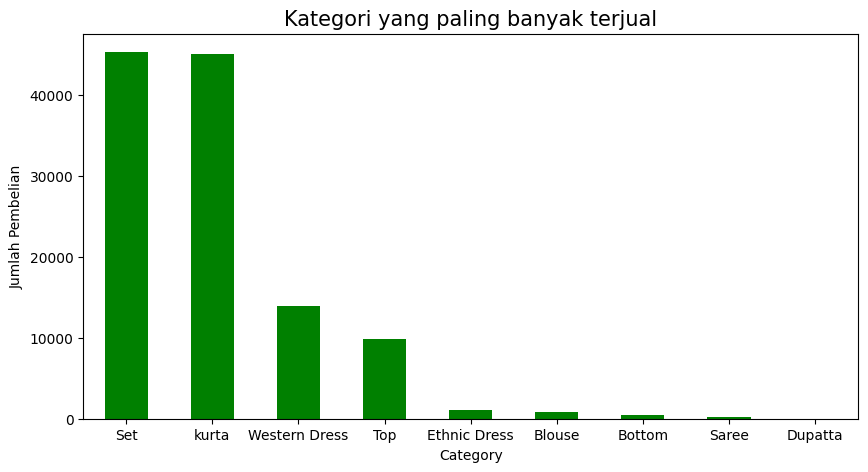

In [67]:
category_count = sales_df.groupby(by="Category").Qty.sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
category_count.plot(kind='bar', color='green')
plt.title("Kategori yang paling banyak terjual", fontsize=15)
plt.xlabel("Category")
plt.ylabel("Jumlah Pembelian")
plt.xticks(fontsize=10, rotation=0)
plt.show()

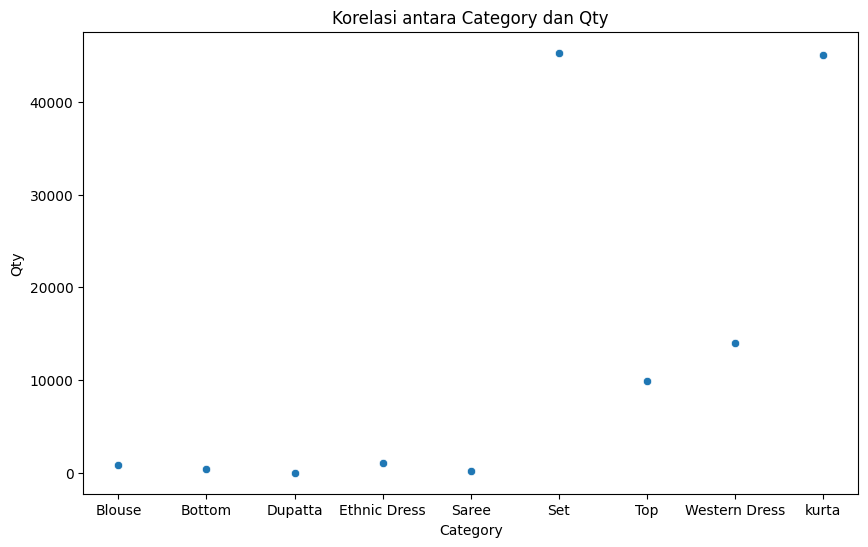

In [68]:
category_qty = sales_df.groupby(by="Category").Qty.sum().reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Category', y='Qty', data=category_qty)
plt.title('Korelasi antara Category dan Qty')
plt.show()


In [69]:
sales_df.groupby(by="Size").Qty.sum().sort_values(ascending=False).reset_index().head(15)

,Size,Qty
0,M,20447
1,L,20000
2,XL,18923
3,XXL,16516
4,S,15331
5,3XL,13524
6,XS,9943
7,6XL,688
8,5XL,513
9,4XL,398


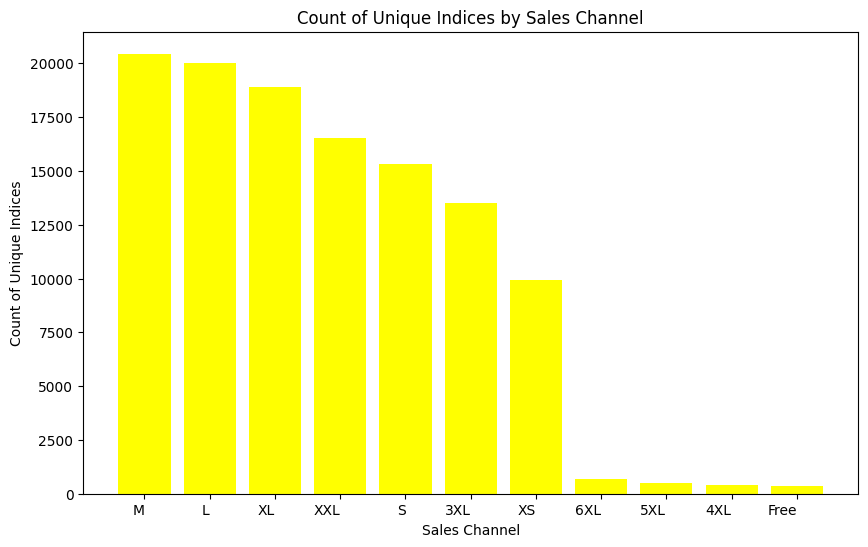

In [70]:
grouped_data = sales_df.groupby(by="Size").Qty.sum().sort_values(ascending=False).reset_index().head(15)
plt.figure(figsize=(10, 6))
plt.bar(grouped_data["Size"], grouped_data["Qty"], color='yellow')
plt.title("Count of Unique Indices by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Count of Unique Indices")
plt.xticks(rotation=0, ha='right')
plt.show()

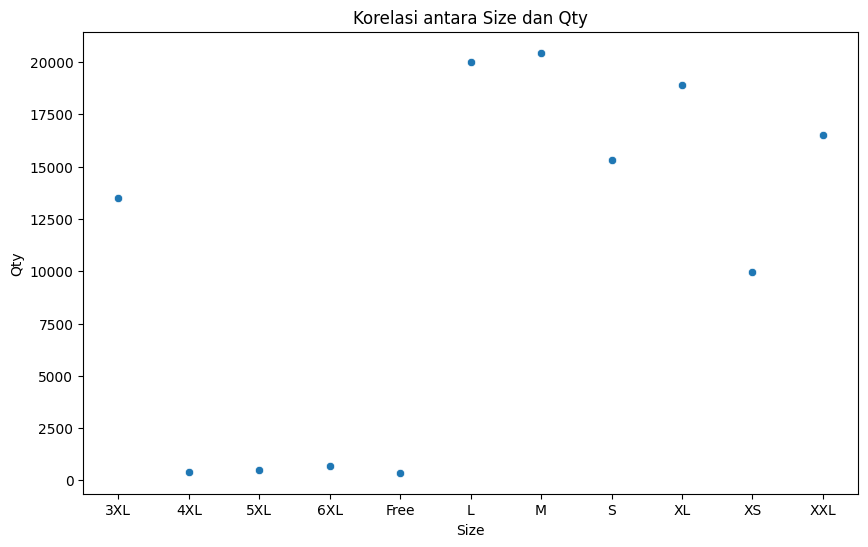

In [71]:
size_qty = sales_df.groupby(by="Size").Qty.sum().reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Qty', data=size_qty)
plt.title('Korelasi antara Size dan Qty')
plt.show()

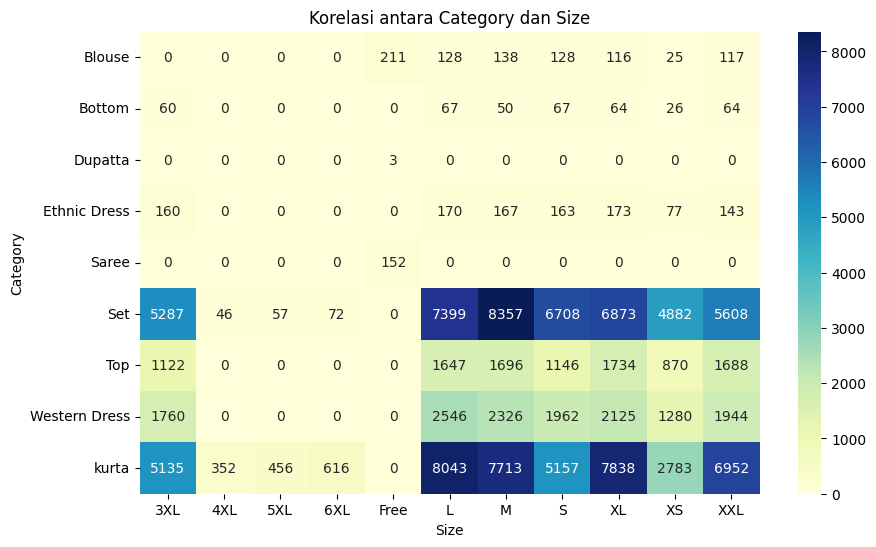

In [72]:
plt.figure(figsize=(10, 6))
heatmap_data = pd.pivot_table(sales_df, values='Qty', index='Category', columns='Size', aggfunc='sum', fill_value=0)
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt='g')
plt.title('Korelasi antara Category dan Size')
plt.show()

### Berapa persentase status pengirimana kurir pada kolom `(Courier Status)`

In [73]:
  jumlah_status_cancelled = len(sales_df[sales_df['Courier Status'] == 'Cancelled'])
  jumlah_status_shipped = len(sales_df[sales_df['Courier Status'] == 'Shipped'])
  jumlah_status_unshipped = len(sales_df[sales_df['Courier Status'] == 'Unshipped'])

  total_persen = len(sales_df)

  persentase_cancelled = (jumlah_status_cancelled / total_persen) * 100
  persentase_shipped = (jumlah_status_shipped / total_persen) * 100
  persentase_unshipped = (jumlah_status_unshipped / total_persen) * 100

  persentase_cancelled_formatted = "{:.2f}".format(persentase_cancelled)
  persentase_shipped_formatted = "{:.2f}".format(persentase_shipped)
  persentase_unshipped_formatted = "{:.2f}".format(persentase_unshipped)

print("Persentase Status Pengiriman Kurir")
print("Status Cancelled:", persentase_cancelled_formatted, "%")
print("Status Shipped:", persentase_shipped_formatted, "%")
print("Status Unshipped:", persentase_unshipped_formatted, "%")

Persentase Status Pengiriman Kurir
Status Cancelled: 9.93 %
Status Shipped: 84.89 %
Status Unshipped: 5.18 %


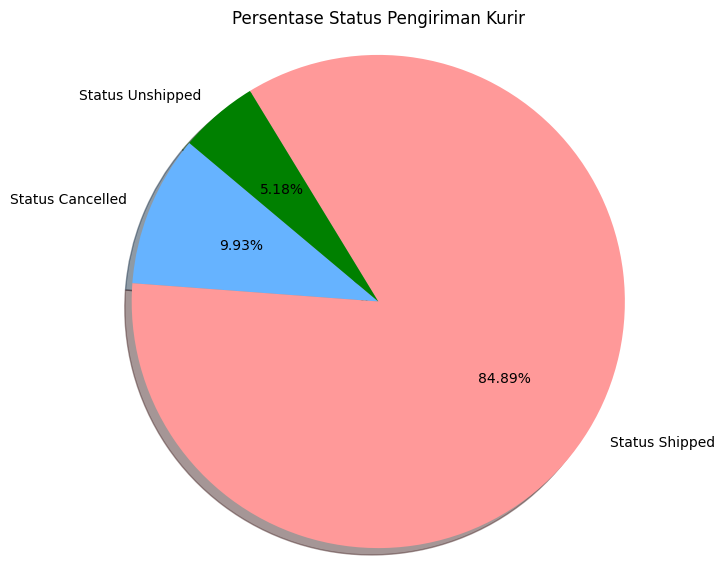

In [74]:
labels = ['Status Cancelled', 'Status Shipped', 'Status Unshipped']
sizes = [persentase_cancelled, persentase_shipped, persentase_unshipped]
colors = ['#66b3ff', '#ff9999', 'green']
explode = (0, 0, 0)

# Membuat diagram pie
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=140)
plt.title("Persentase Status Pengiriman Kurir")
plt.axis('equal')

plt.show()

### Produk apa saja yang paling laris setiap bulannya?

In [75]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

# Menambahkan kolom 'Month' untuk menyimpan informasi bulan
sales_df['Month'] = sales_df['Date'].dt.to_period('M')

# Menghitung jumlah penjualan per bulan dan per kategori
monthly_sales = sales_df.groupby(['Month', 'Category']).agg({'Qty': 'sum'}).reset_index()

# Mendapatkan indeks baris dengan jumlah penjualan tertinggi dalam setiap bulan
max_qty_indices = monthly_sales.groupby('Month')['Qty'].idxmax()

# Memilih baris dengan jumlah penjualan tertinggi
top_selling_products = monthly_sales.loc[max_qty_indices]

# Mengonversi angka bulan menjadi nama bulan
top_selling_products['Month'] = top_selling_products['Month'].dt.strftime('%B')

# Menampilkan hasil
top_selling_products

,Month,Category,Qty
5,March,kurta,71
10,April,Set,18143
18,May,Set,14406
30,June,kurta,13748


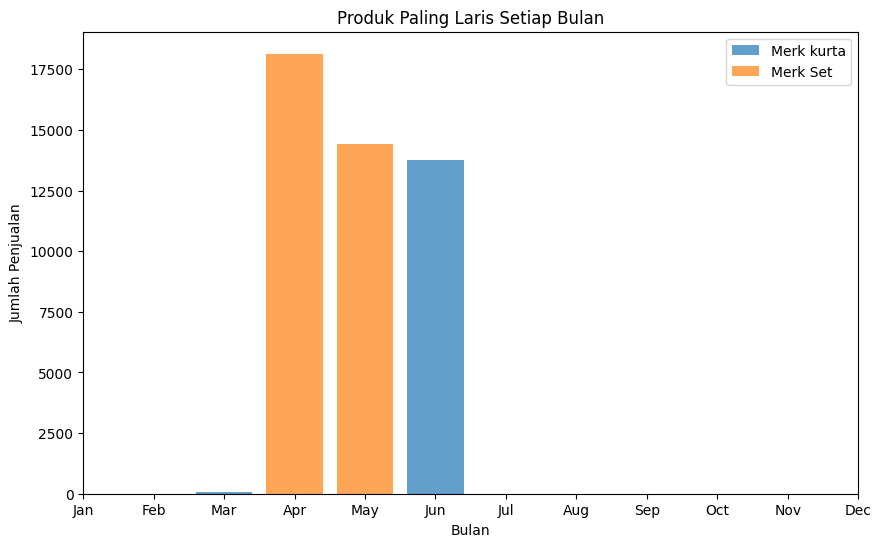

In [76]:
# Assuming 'Month' column contains month names like 'January', 'February', etc.
top_selling_products['Month'] = pd.to_datetime(top_selling_products['Month'], format='%B').dt.month

# Sort the DataFrame by the 'Month' column
top_selling_products = top_selling_products.sort_values(by='Month')

plt.figure(figsize=(10, 6))
for category in top_selling_products['Category'].unique():
    category_data = top_selling_products[top_selling_products['Category'] == category]
    plt.bar(category_data['Month'], category_data['Qty'], label=f'Merk {category}', alpha=0.7)  # Added alpha for transparency

plt.title('Produk Paling Laris Setiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Customize the x-axis ticks
plt.legend()
plt.show()


### Perbandingan Pembelian melalui Amazon atau Merchant dengan status pengiriman `'courir_status'` & `'Fulfilment'`

In [77]:
status_cancelled = sales_df[sales_df["Courier Status"] == "Cancelled"].groupby(by="Fulfilment")["index"].nunique()

status_shipped = sales_df[sales_df["Courier Status"] == "Shipped"].groupby(by="Fulfilment")["index"].nunique()

status_unshipped = sales_df[sales_df["Courier Status"] == "Unshipped"].groupby(by="Fulfilment")["index"].nunique()

hasil_analisis = pd.DataFrame({
    "Status Cancelled": status_cancelled,
    "Status Shipped": status_shipped,
    "Status Unshipped": status_unshipped
})

hasil_analisis

,Status Cancelled,Status Shipped,Status Unshipped
Fulfilment,,,
Amazon,5935,77606,6157
Merchant,6872,31881,524


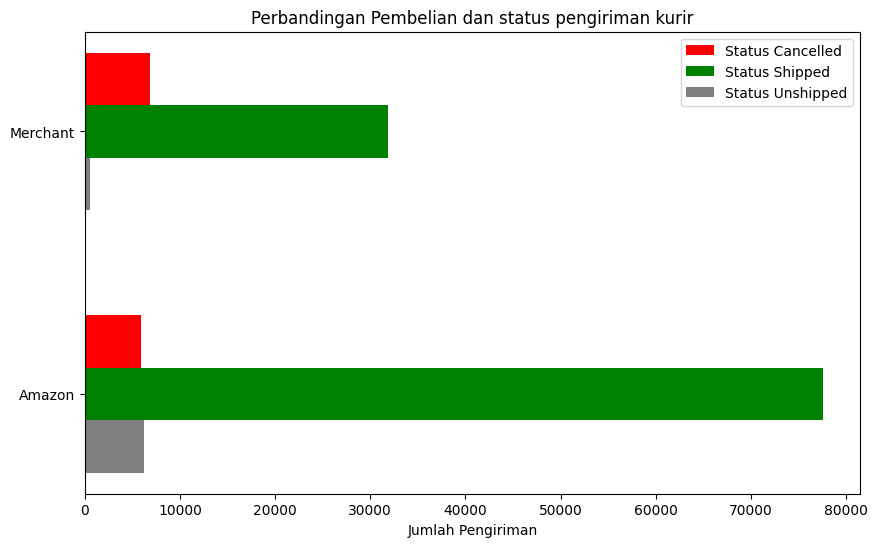

In [78]:
status = hasil_analisis.index
status_cancelled = hasil_analisis["Status Cancelled"]
status_shipped = hasil_analisis["Status Shipped"]
status_unshipped = hasil_analisis["Status Unshipped"]

# Lebar diagram batang
bar_width = 0.2

# Posisi x untuk setiap grup
x = range(len(status))

# Membuat diagram batang horizontal
plt.figure(figsize=(10, 6))
plt.barh([i + bar_width for i in x], status_cancelled, bar_width, label="Status Cancelled", color='red')
plt.barh(x, status_shipped, bar_width, label="Status Shipped", color='green')
plt.barh([i - bar_width for i in x], status_unshipped, bar_width, label="Status Unshipped", color='gray')

# Label sumbu x
plt.yticks(x, status)
plt.xlabel("Jumlah Pengiriman")
plt.title("Perbandingan Pembelian dan status pengiriman kurir")

# Menambahkan legenda
plt.legend()

plt.show()

### 10 Provinsi dengan pengiriman yang paling banyak? `ship-city`

In [79]:
sales_df.groupby(by="ship-city").index.nunique().sort_values(ascending=False).reset_index().head(10)

,ship-city,index
0,BENGALURU,11250
1,HYDERABAD,8074
2,MUMBAI,6126
3,NEW DELHI,5795
4,CHENNAI,5421
5,PUNE,3857
6,KOLKATA,2381
7,GURUGRAM,1868
8,THANE,1701
9,LUCKNOW,1458


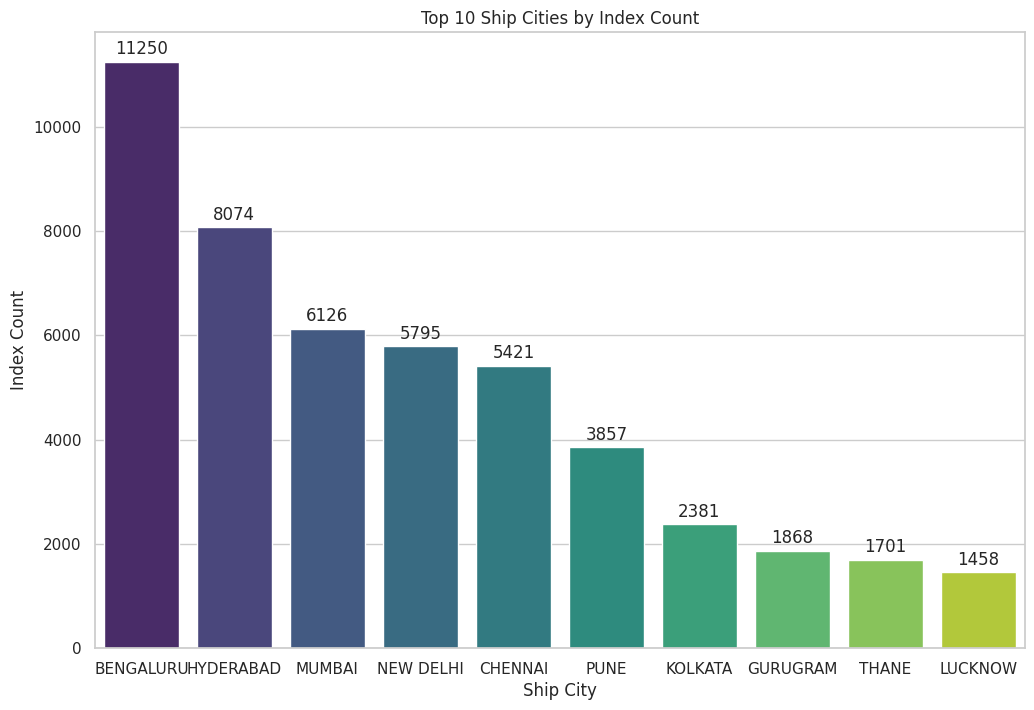

In [80]:
sales_df_grouped = sales_df.groupby(by="ship-city").index.nunique().sort_values(ascending=False).reset_index().head(10)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='ship-city', y='index', data=sales_df_grouped, palette='viridis')

plt.title('Top 10 Ship Cities by Index Count')
plt.xlabel('Ship City')
plt.ylabel('Index Count')

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 9),
                       textcoords = 'offset points')

plt.show()

### 10 Ibu kota dengan pengiriman yang paling banyak? `ship-state`

In [81]:
sales_df.groupby(by="ship-state").index.nunique().sort_values(ascending=False).reset_index().head(10)

,ship-state,index
0,MAHARASHTRA,22293
1,KARNATAKA,17326
2,TAMIL NADU,11483
3,TELANGANA,11330
4,UTTAR PRADESH,10638
5,DELHI,6782
6,KERALA,6585
7,WEST BENGAL,5963
8,ANDHRA PRADESH,5430
9,Gujarat,4489


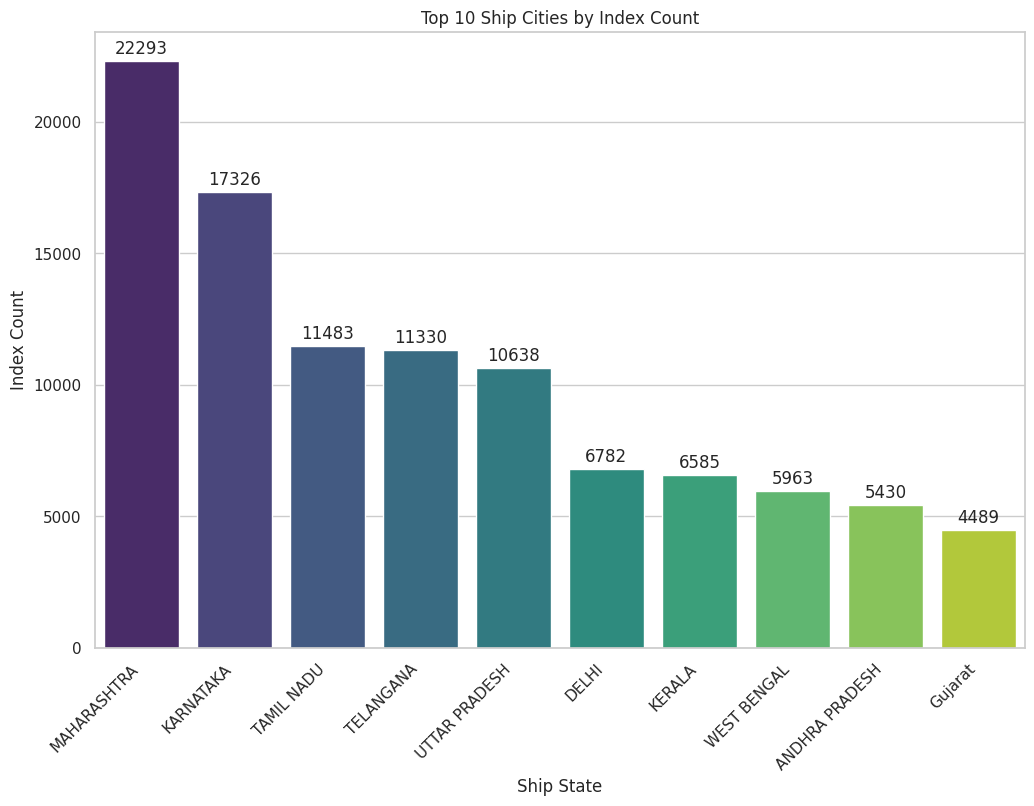

In [82]:
sales_df_grouped = sales_df.groupby(by="ship-state").index.nunique().sort_values(ascending=False).reset_index().head(10)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='ship-state', y='index', data=sales_df_grouped, palette='viridis')

plt.title('Top 10 Ship Cities by Index Count')
plt.xlabel('Ship State')
plt.ylabel('Index Count')

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 9),
                       textcoords = 'offset points')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha='right')

plt.show()

### Berapa banyak dari persentasi yang menggunakan B2B False or True? kolom `('B2B')`

In [83]:
sales_df.groupby(by="B2B").index.nunique().sort_values(ascending=False).reset_index().head()

,B2B,index
0,False,128104
1,True,871


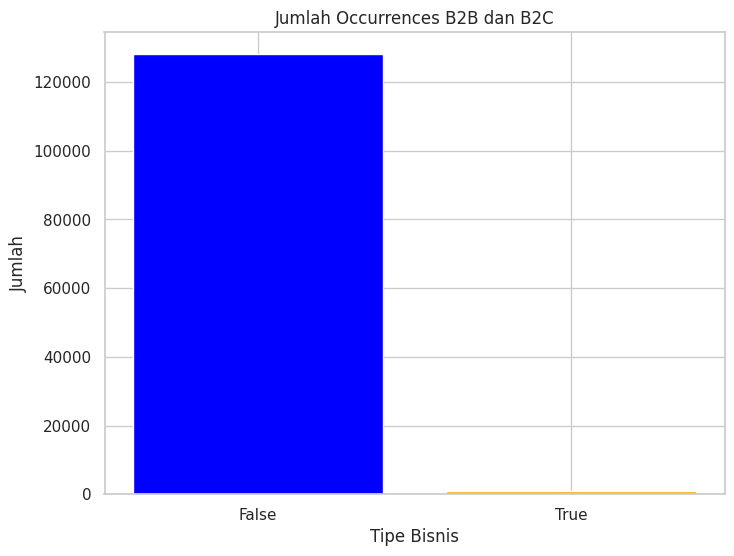

In [84]:
grouped_df = sales_df.groupby('B2B').size().reset_index(name='Count')

# Creating bar chart
plt.figure(figsize=(8, 6))
plt.bar(grouped_df['B2B'].astype(str), grouped_df['Count'], color=['blue', 'orange'])
plt.xlabel('Tipe Bisnis')
plt.ylabel('Jumlah')
plt.title('Jumlah Occurrences B2B dan B2C')
plt.show()

In [85]:
jumlah_b2b = len(sales_df[sales_df['B2B'] == 0])
jumlah_b2bT = len(sales_df[sales_df['B2B'] == 1])

total_persentase = len(sales_df)

persentase_b2b = (jumlah_b2b / total_persentase) * 100
persentase_b2bT = (jumlah_b2bT / total_persentase) * 100

persentase_b2b_formatted = "{:.2f}".format(persentase_b2b)
persentase_b2bT_formatted = "{:.2f}".format(persentase_b2bT)

print("Persentase B2B (True or False)")
print("B2B FALSE:", persentase_b2b_formatted, "%")
print("B2B TRUE:", persentase_b2bT_formatted, "%")


Persentase B2B (True or False)
B2B FALSE: 99.32 %
B2B TRUE: 0.68 %


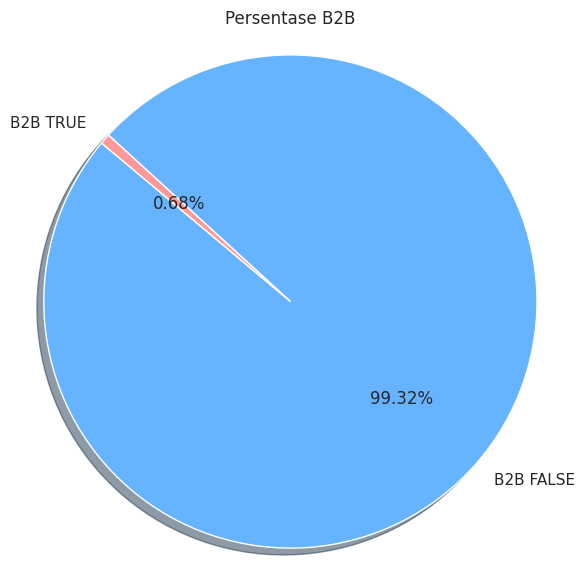

In [86]:
labels = ['B2B FALSE', 'B2B TRUE']
sizes = [persentase_b2b_formatted, persentase_b2bT_formatted]
colors = ['#66b3ff', '#ff9999']
explode = (0, 0)

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=140)
plt.title("Persentase B2B")
plt.axis('equal')

plt.show()